# Problem Statement:

Try to understand and find out and predict the sales of each product at a particular store of BigMart Sales.

# Importing libraries

In [263]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost 
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

 Obs : 
- Imporing Necessaries libraries: Numpy, pandas, matplotlib & seaborn.
- Importing 5 Machine learning Algorrithm : Linear Regression, Decision Tree Regressor,Randomforest regressor, SVM reg, XGB reg.
- Importing Common Regression Metrics Mean Absolute error, Mean Squared error.
- Importing Label encoder libraries as well as standard scaler libraries.

# Loading Train Dataset.

In [264]:
train = pd.read_csv('bigdatamart_train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


- There are two dataset training & test.
- Model to prepared on Traininig set and test set will be used for prediction.
- Loading Training Dataset

# Loading Test Dataset

In [265]:
test=pd.read_csv('bigdatamart_test.csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


- Loading Test Dataset.

# Initial Analysis

In [266]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

- Train dataset has bot objects, Float & Int Variables & Target Varible- 'Item_Outlet_Sales'
- Datset has both objects, Float & Int Variable

In [267]:
test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

- Test Dataset do not have Target Column -Item_Outlet_Sales 
- Datset has both objects, Float & Int Variable

In [268]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


- Variable is indexed from 0 to 11.
- There are Missing Values present in Outlet Size & Item Weight.

In [269]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


- test set also has missing value in Item weight & Outlet size
- Data type is objecs, float & integer data type.

In [270]:
train.shape

(8523, 12)

- train set has 8523 rows or observations.
- Has 12 Column.

In [271]:
test.shape

(5681, 11)

- Test set has 5681 rows or observations.
- Has 11 Column.
- Target Column is not present in Test set.

# Merging Train & Test Dataset for better EDA

In [272]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

- There are no spaces present in columns in train set.
- Shows Correct Column Names.

In [273]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

- Target Col (Item_Outlet_Sales) Missing in test set.

- As we can see train set has 12 col and test set has 11 col.
- where target col is present in train set so i have merged train & test as on one file for EDA 
- And will split the file back again in train & test before applying algorithm.

In [275]:
train['reference']='train'
test['reference']='test'

- Adding New reference Col in train & Test set to differentiate after merging Train & Test Set.
- This reference col will help to separate back train & test set later 

In [276]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'reference'],
      dtype='object')

- New Reference is added in train test set to differentiate train set & test set

In [277]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'reference'],
      dtype='object')

- New Reference column  is added in train & test set to differentiate train & test set

In [278]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,reference
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


- Reference Col Shows Value as train in reference variable of train set before merging

In [279]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,reference
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,test
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,test


- Reference Col Shows Value as test in reference variable of test set before merging.

# Merging train & test set

In [280]:
merge_train_test = [train,test]

- List is Created for train & Test to merge both train & test set

In [281]:
df= pd.concat(merge_train_test)

- New dataframe is created as df after merging train & test set.
- as we can see train set has 12 col and test set has 11 col.
- where target col is present in train set so i have merged train & test as on one file for better EDA 
- dataset is merged to treat missing value, outliers, skewness etc.
- the new dataframe (df) will split back again in train & test before applying algorithm.
- After merging the new dataframe will show 5681 as missing value in target column because the same target is 
missing in test set.
- The missing value in target col after merging will be treated later.

In [282]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,reference
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [283]:
df.shape

(14204, 13)

- the new dataframe after merging shows 14204 rows and 13 column

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  reference                  14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage

- the new df shows reference col which was created to diff train & test set which is indexed at 12.

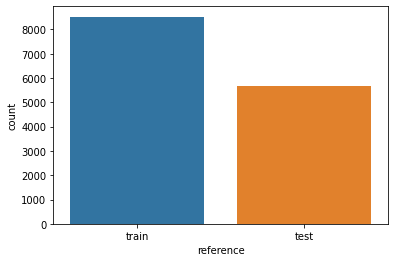

In [285]:
sns.countplot(df['reference']);

- The count plot shows the new df is merged with reference col to diff train & test set.

In [286]:
df.groupby('reference').size()

reference
test     5681
train    8523
dtype: int64

- the new df is differentiated with reference col.
- the new df has 8523 observations belongs to train set.
- the new df has 5681 observations belongs to test set.
- the new df will be splitted back into train & test after EDA treatment.

In [287]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'reference'],
      dtype='object')

- the new df shows all the column along with new reference column.

# Column : Item_Fat_Content Treatment:

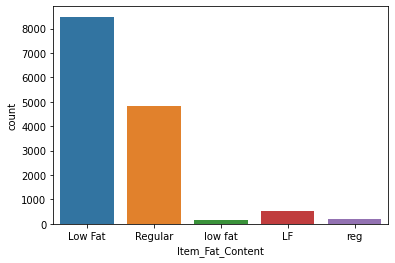

In [288]:
sns.countplot(df['Item_Fat_Content']);

- the plot shows that Item_Fat_Content has duplicate entries which is treated below.

In [289]:
df.groupby('Item_Fat_Content').size()

Item_Fat_Content
LF          522
Low Fat    8485
Regular    4824
low fat     178
reg         195
dtype: int64

- duplicate entries of Low Fat & Regular Fat is present in this column

In [290]:
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

- duplicate entries of Low Fat & Regular Fat is present in this column

In [291]:
df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'},inplace = True)

- Duplicate entries are treated with Low Fat & Regular Fat
- Duplicate Entries of 'LF' is replace with 'Low Fat'
- Duplicate Entries of 'low fat' is replace with 'Low Fat'
- Duplicate Entries of 'reg' is replace with 'Regular'

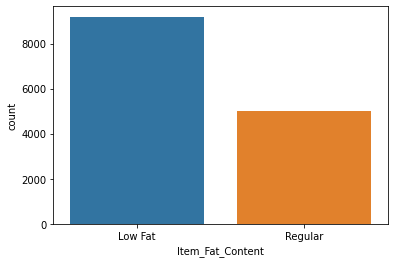

In [292]:
sns.countplot(df['Item_Fat_Content']);

- Low Fat Count is more then Regular fat after treating duplicates.

In [293]:
df.groupby('Item_Fat_Content').size()

Item_Fat_Content
Low Fat    9185
Regular    5019
dtype: int64

- After replacing duplicate Low Fat has 9185 obs Regular has 5019 obs.

#  Categorical Variable Analysis.

In [294]:
df.groupby('Item_Type').size()

Item_Type
Baking Goods             1086
Breads                    416
Breakfast                 186
Canned                   1084
Dairy                    1136
Frozen Foods             1426
Fruits and Vegetables    2013
Hard Drinks               362
Health and Hygiene        858
Household                1548
Meat                      736
Others                    280
Seafood                    89
Snack Foods              1989
Soft Drinks               726
Starchy Foods             269
dtype: int64

- Shows different itme type and values present in dataset.
- Fruits & Vegetables has highest entries present in dataset.
- Sea food entries is the least one.

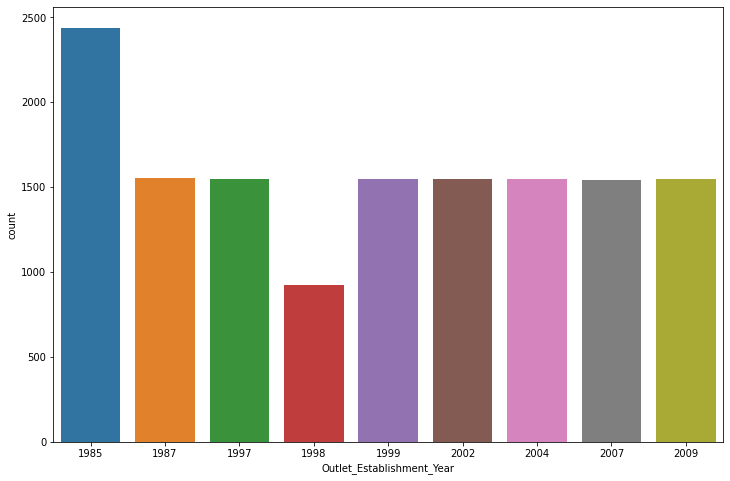

In [295]:
fig, ax =plt.subplots(figsize=(12,8))
sns.countplot(df['Outlet_Establishment_Year']);

- Most of the outlet had established in the year 1985 as seen in plot above.
- The least outlet established in the year 1998.

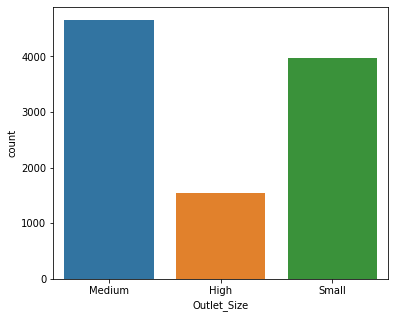

In [296]:
fig, ax =plt.subplots(figsize=(6,5))
sns.countplot(df['Outlet_Size']);

- Medium Type Outlet Size is the highest among all.
- the count of Highest outlet size is the least. 

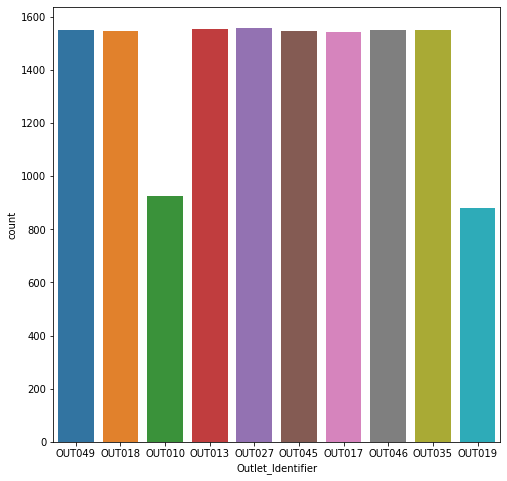

In [297]:
fig, ax =plt.subplots(figsize=(8,8))
sns.countplot(df['Outlet_Identifier']);

- Most of the outlet identifier falls in similar range.

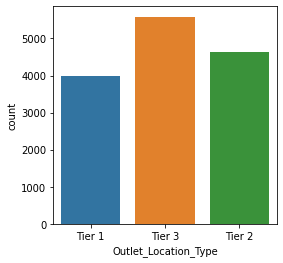

In [298]:
fig, ax =plt.subplots(figsize=(4,4))
sns.countplot(df['Outlet_Location_Type']);

- Tier 3 outlet type is highest among Tier 1 & Tier 2

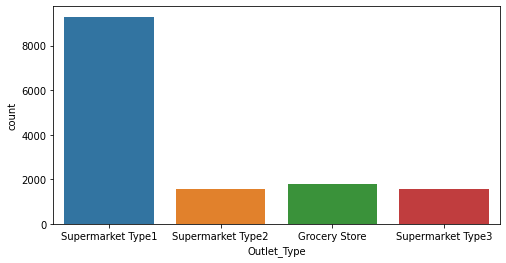

In [300]:
fig, ax =plt.subplots(figsize=(8,4))
sns.countplot(df['Outlet_Type']);

- The outlet of Supermaret type is the highest.
- Rest all are of almost same counts.

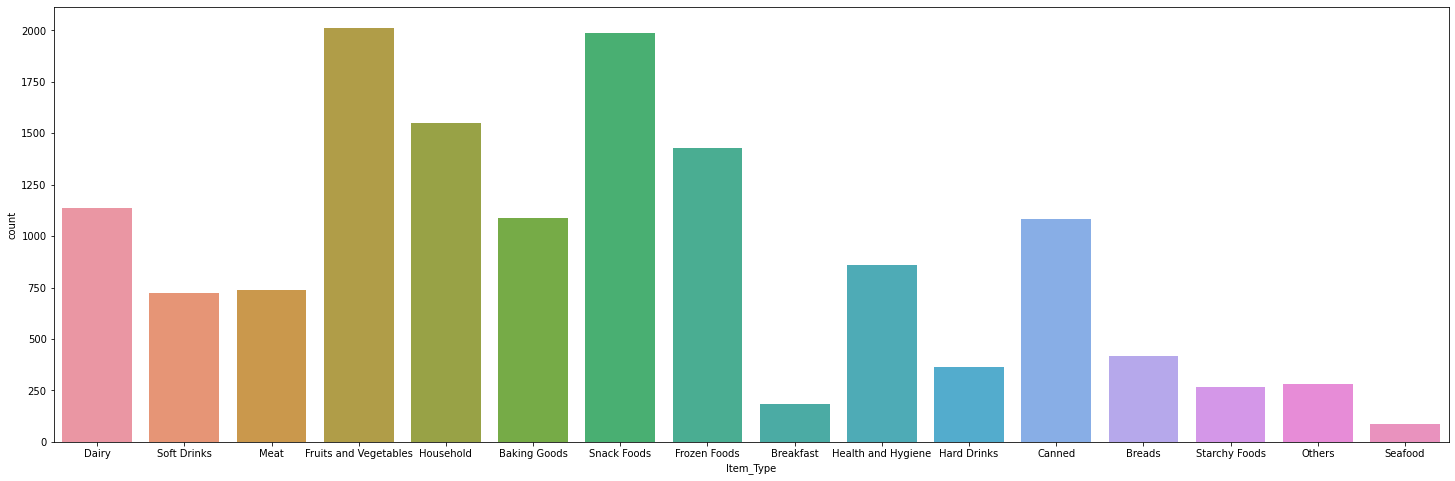

In [301]:
fig, ax =plt.subplots(figsize=(25,8))
sns.countplot(df['Item_Type']);

- Shows different itme type and entries present in dataset.
- Fruits & Vegetables has highest count present in dataset.
- Sea food count is the least one.

### Pairplot

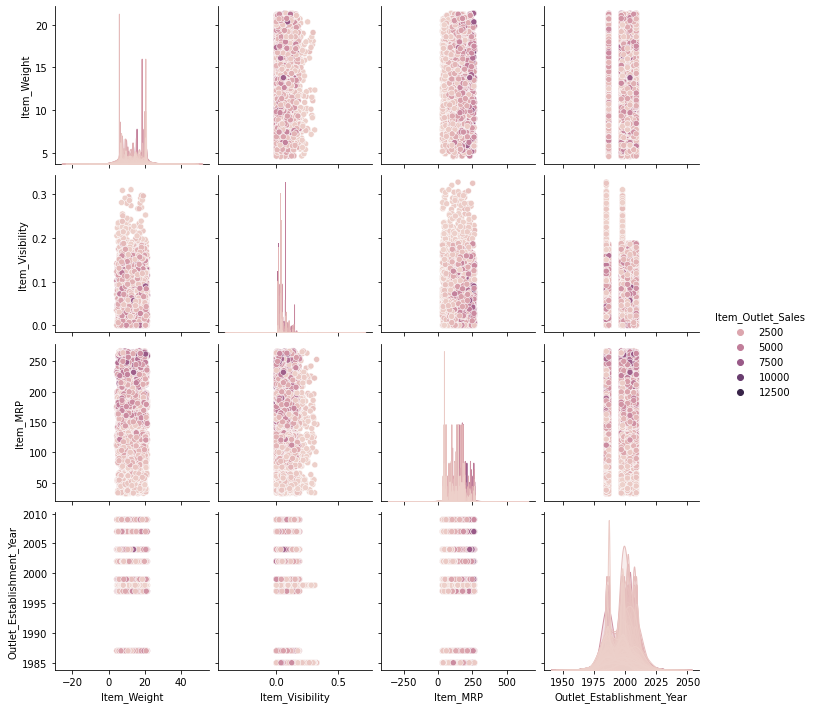

In [303]:
sns.pairplot(train,hue="Item_Outlet_Sales")

- Sales is high with higher MRP value for Item weight value 0 to 20
- Most of the mid range sales seen in mid value of most of the variables in x Cordinates between min to max value of y cordinates variables.

# Missing Value

In [307]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
reference                       0
dtype: int64

- Item weight, Outlet Size has higher value of missing value.
- Item outlet sales shows missing value after merging with test set because test set do not have target variables.
- Item weight & Outlet size is influencing Target Variable henc e cannot be dropped.

In [308]:
df['Item_Visibility'] = df['Item_Visibility'].replace(0,np.nan)

- There are missing value in this col which are present with zero value.
- These zero value got converted to NAN values to treat missing value.

In [309]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility               879
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
reference                       0
dtype: int64

- 4 col shows missing value which are treated as per there normality distribution.

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

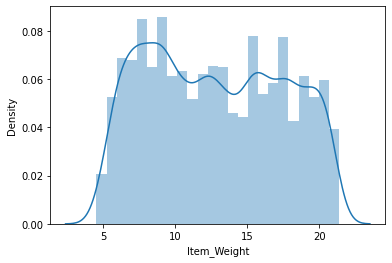

In [310]:
sns.distplot(df['Item_Weight'])

- Missing value will be treated by Median as  distribution is not Normal.

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

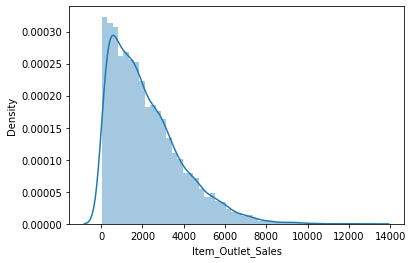

In [311]:
sns.distplot(df['Item_Outlet_Sales'])

- Missing value will be treated by Median as  distribution is not Normal.

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

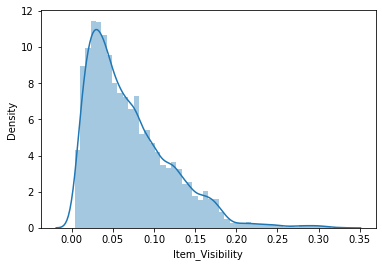

In [312]:
sns.distplot(df['Item_Visibility'])

- Missing value will be treated by Median as  distribution is not Normal.

In [313]:
df["Item_Outlet_Sales"] = df["Item_Outlet_Sales"].fillna(df["Item_Outlet_Sales"].median())
df["Item_Visibility"] = df["Item_Visibility"].fillna(df["Item_Visibility"].median())
df["Item_Weight"] = df["Item_Weight"].fillna(df["Item_Weight"].median())
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].value_counts().idxmax())

- Outlet size missing value is treated with mode as it is categorical variable.
- Missing Value are treated with Median as there distribution is not normal in "Item_Outlet_Sales", "Item_Visibility" & "Item_Weight" Column

In [314]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
reference                    0
dtype: int64

- No Missing value seen after treatment.

# Separating Object & Numeric Column for Easy Analysis.

In [315]:
numerics = ['float64', 'int64']
numeric_ds = df.select_dtypes(include=numerics)
objects_ds = df.select_dtypes(exclude=numerics)

- Numerical & Objects Variable are separated for better Analysis.

In [316]:
objects_ds.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,reference
count,14204,14204,14204,14204,14204,14204,14204,14204
unique,1559,2,16,10,3,3,4,2
top,NCE31,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1,train
freq,10,9185,2013,1559,8671,5583,9294,8523


- Highest Unique Value seen in Item_Identifier with top one is NCE31 whose freq count is 10
- Item_Fat_Content has two unique count after removing duplicates with Low Fat has high freq
- Reference variable is added with two unique value as train & test to split the dataframe later.
- Similar Observation seen for other variables.

In [317]:
numeric_ds.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.759739,0.069533,141.004977,1997.830681,2026.522094
std,4.234851,0.048683,62.086938,8.371664,1335.388924
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,9.300000,0.033143,94.012000,1987.000000,1468.089000
50%,12.600000,0.057851,142.247000,1999.000000,1794.331000
75%,16.000000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


- std value is very high in target col -Item_Outlet_Sales
- Also Big Diff in Max & 75th Percentile value in Target col.
- Mean is greater then 5oth percentile in target col.
- Mean is slightly  Greater then 50th Percentile in in item weight col.
- Mean is slightly less in then 5oth percentile in item MRP col.
- as per above first theree obs skewness is present in target col.
- there is high diff in max & 75th percentile in item visibility col,skewness is present.

# 

array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>],
       [<AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>],
       [<AxesSubplot:title={'center':'Item_Outlet_Sales'}>,
        <AxesSubplot:>]], dtype=object)

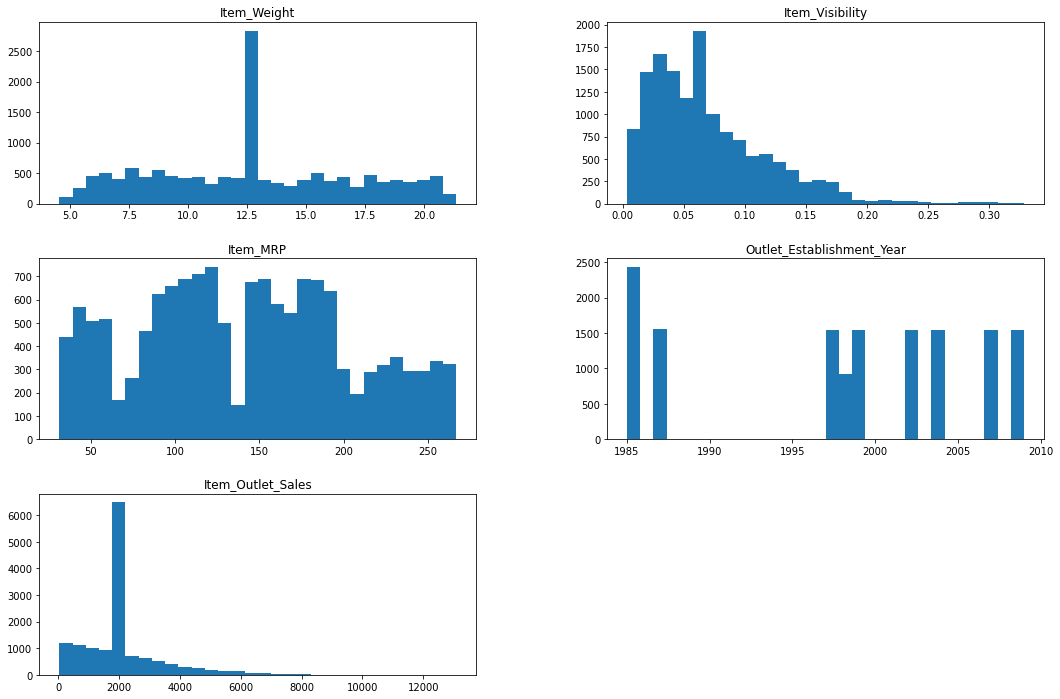

In [318]:
numeric_ds.hist(grid=False, figsize=(18,12), bins=30)

- Skewness is visible in item visbility and target col.

# Skewness Detection

In [319]:
numeric_ds.skew()

Item_Weight                  0.134711
Item_Visibility              1.344050
Item_MRP                     0.130728
Outlet_Establishment_Year   -0.396465
Item_Outlet_Sales            1.813869
dtype: float64

- Item visbility & Item outlet sales shows positive skewness.

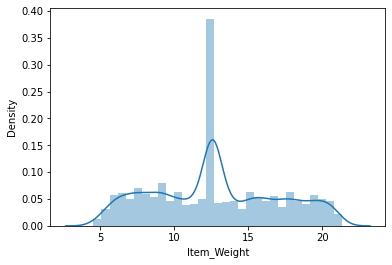

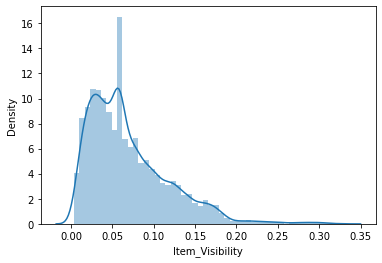

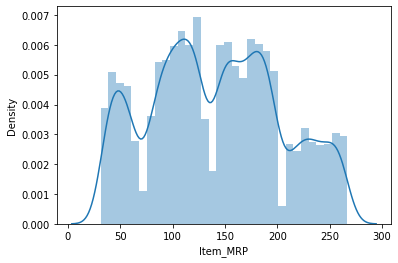

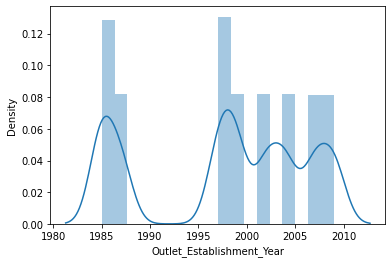

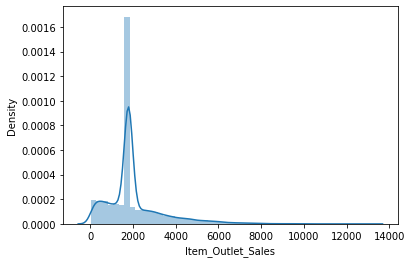

In [320]:
for i in numeric_ds:
    plt.figure()
    sns.distplot(numeric_ds[i])

- Item visibility and Target col data are right skewed.

# Correlation

In [321]:
numeric_dscor=numeric_ds.corr()
numeric_dscor

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.016986,0.033008,0.012448,0.009623
Item_Visibility,-0.016986,1.000000,-0.008522,-0.088450,-0.102564
Item_MRP,0.033008,-0.008522,1.000000,0.000141,0.436478
Outlet_Establishment_Year,0.012448,-0.088450,0.000141,1.000000,-0.037651
Item_Outlet_Sales,0.009623,-0.102564,0.436478,-0.037651,1.000000


- Target Col shows positive correlation with Item MRP col
- Target col shows most of the high negative correlation with independent variable except Item MRP col
- Most of the relationship shows high negative correlation among independent variable.

# Heatmap

<AxesSubplot:>

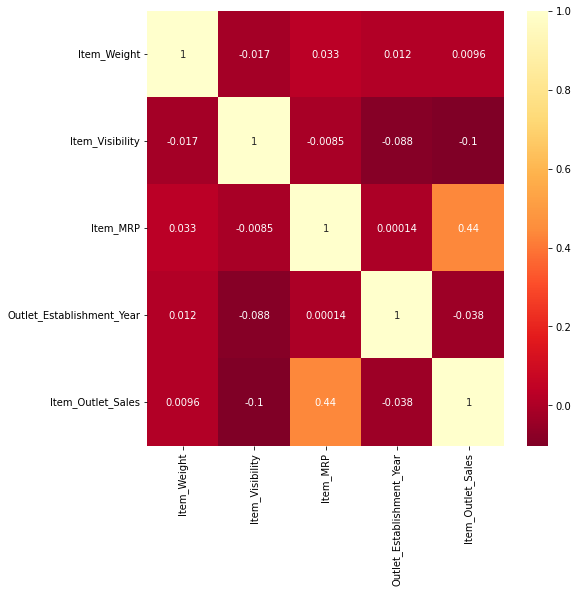

In [322]:
plt.figure(figsize=(8,8))
sns.heatmap(numeric_dscor,cmap='YlOrRd_r', annot=True)

- Target Col shows positive correlation with Item MRP col
- Target col shows most of the high negative correlation with independent variable except Item MRP col
- Most of the relationship shows high negative correlation among independent variable.

In [323]:
dfcor=df.corr()
dfcor

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.016986,0.033008,0.012448,0.009623
Item_Visibility,-0.016986,1.000000,-0.008522,-0.088450,-0.102564
Item_MRP,0.033008,-0.008522,1.000000,0.000141,0.436478
Outlet_Establishment_Year,0.012448,-0.088450,0.000141,1.000000,-0.037651
Item_Outlet_Sales,0.009623,-0.102564,0.436478,-0.037651,1.000000


<AxesSubplot:>

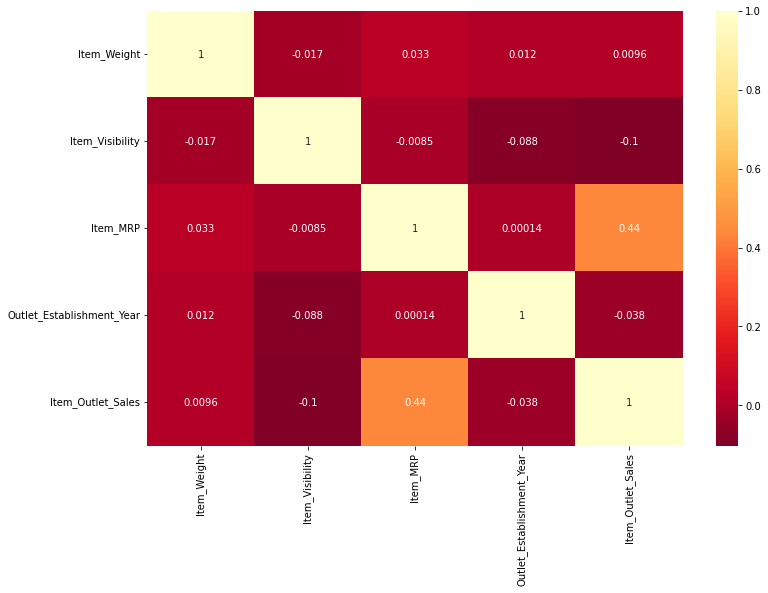

In [324]:
plt.figure(figsize=(12,8))
sns.heatmap(dfcor,cmap='YlOrRd_r', annot=True)

# Labelencoder

In [328]:
cat_vars_list = objects_ds.columns.tolist()
## Label Encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in cat_vars_list :
    df[i] = le.fit_transform(df[i])

- All objects col values is label encoded within dataframe.

# VIF:Multicollinearity Test

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor # imporitng VIF libraries

In [331]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif["features"]=df.columns
    print(vif)

- Computing VIF for all variables

In [332]:
vif_calc()

    VIF Factor                   features
0     4.078708            Item_Identifier
1    10.131148                Item_Weight
2     1.605689           Item_Fat_Content
3     3.210502            Item_Visibility
4     4.049821                  Item_Type
5     7.906134                   Item_MRP
6    15.553192          Outlet_Identifier
7    58.676394  Outlet_Establishment_Year
8     8.018914                Outlet_Size
9    16.617669       Outlet_Location_Type
10    8.900204                Outlet_Type
11    4.863136          Item_Outlet_Sales
12    2.575490                  reference


- Outlet establishment shows high VIF value.
- outlet identifier & outlet location type shows multicollinearity 
- None of the col is dropped as the total avaliable col is not very high.

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  int32  
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  int32  
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  int32  
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  int32  
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  int32  
 9   Outlet_Location_Type       14204 non-null  int32  
 10  Outlet_Type                14204 non-null  int32  
 11  Item_Outlet_Sales          14204 non-null  float64
 12  reference                  14204 non-null  int32  
dtypes: float64(4), int32(8), int64(1)
memory usage:

- After label encoded all objects col got converted to float or int. 

In [333]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,reference
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,1
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,1
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,1
3,1121,19.20,1,0.057851,6,182.0950,0,1998,1,2,0,732.3800,1
4,1297,8.93,0,0.057851,9,53.8614,1,1987,0,2,1,994.7052,1


- label Encoded value seen in dataframe for categorical varaibles.

# Outliers Detection & Removal

<AxesSubplot:>

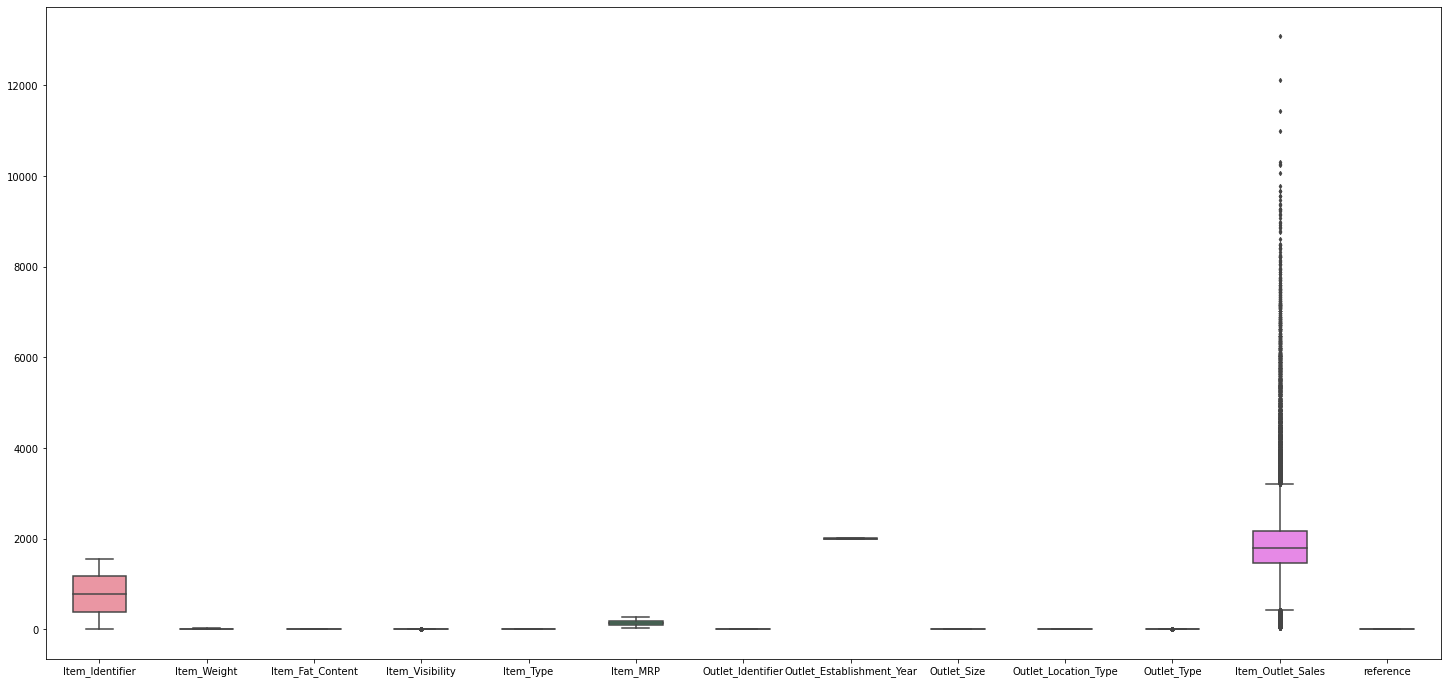

In [334]:
fig, ax =plt.subplots(figsize=(25,12))
sns.boxplot(data=df, width = 0.5,ax=ax, fliersize=3)

- Target Col shows very high values.

In [335]:
#detecting outliers
from scipy.stats import zscore
dfzscore=np.abs(zscore(df))
print(np.where(dfzscore>3))

(array([   43,    49,    55,    83,   108,   130,   132,   145,   146,
         174,   203,   240,   243,   275,   276,   281,   304,   333,
         337,   352,   373,   402,   424,   434,   456,   472,   497,
         502,   521,   532,   640,   641,   661,   694,   753,   809,
         844,   847,   854,   903,   915,   935,   981,   991,   997,
        1009,  1012,  1040,  1043,  1044,  1067,  1092,  1113,  1127,
        1138,  1159,  1206,  1254,  1272,  1291,  1311,  1324,  1348,
        1363,  1393,  1434,  1450,  1467,  1496,  1501,  1506,  1560,
        1564,  1565,  1575,  1601,  1611,  1627,  1644,  1650,  1651,
        1658,  1669,  1700,  1705,  1709,  1710,  1751,  1805,  1821,
        1827,  1835,  1841,  1859,  1879,  1903,  1925,  1987,  1996,
        1998,  2040,  2088,  2107,  2109,  2122,  2216,  2238,  2251,
        2282,  2293,  2324,  2336,  2437,  2439,  2445,  2516,  2528,
        2535,  2549,  2586,  2589,  2599,  2613,  2615,  2648,  2680,
        2687,  2728

In [336]:
dfnew=df[(dfzscore<3).all(axis=1)]
print('dfnew.shape=',dfnew.shape)

df=dfnew

dfnew.shape= (13740, 13)


- No of observation got reduced after removing outliers.

In [337]:
Data_loss=((14204-13740)/14204)*100

- Computing percentage of outliers removed

In [338]:
Data_loss

3.2666854407209236

- The total outlier removed is less then 8 % hence outlier removed.

# Skewness Removal

In [339]:
numeric_ds.skew()

Item_Weight                  0.134711
Item_Visibility              1.344050
Item_MRP                     0.130728
Outlet_Establishment_Year   -0.396465
Item_Outlet_Sales            1.813869
dtype: float64

- Item visibility & Target Col shows positive Skewness

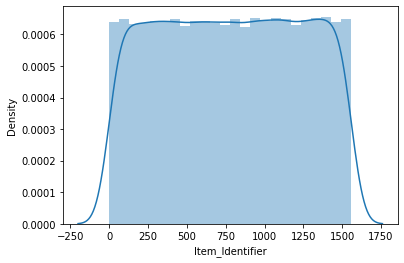

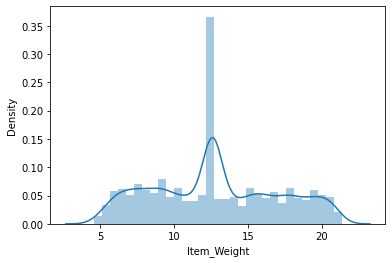

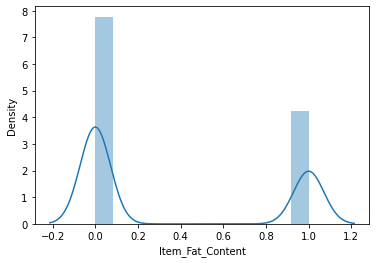

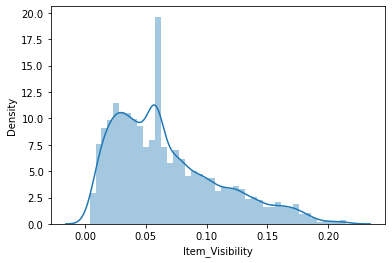

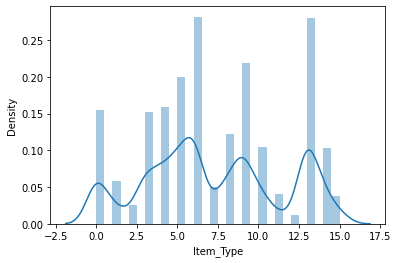

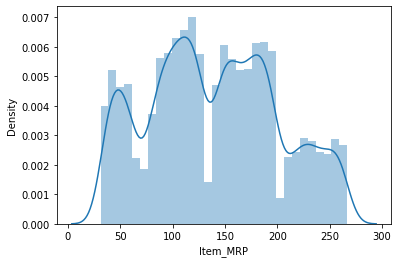

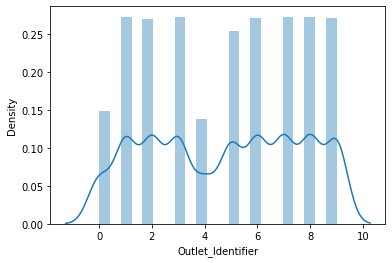

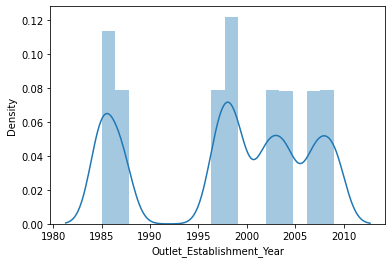

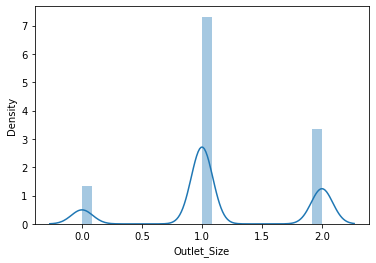

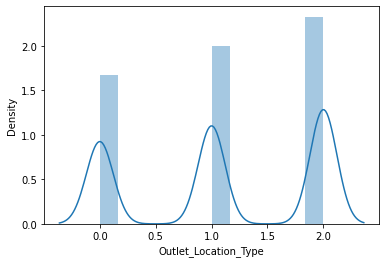

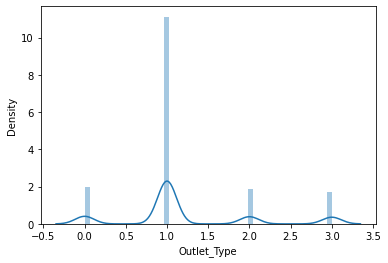

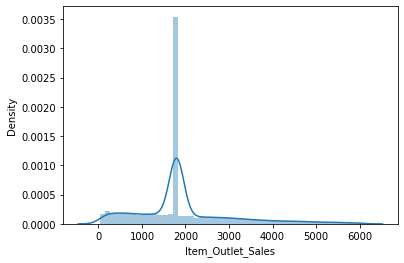

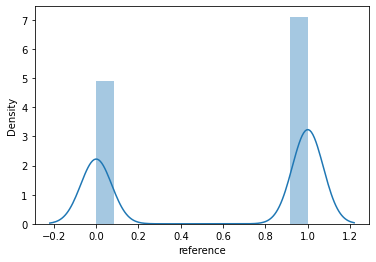

In [341]:
for i in df:
    plt.figure()
    sns.distplot(df[i])

In [342]:
import numpy as np
df['Item_Visibility']=np.sqrt(df['Item_Visibility'])
df.skew()

Item_Identifier             -0.005679
Item_Weight                  0.131492
Item_Fat_Content             0.618665
Item_Visibility              0.253224
Item_Type                    0.094148
Item_MRP                     0.150574
Outlet_Identifier           -0.065614
Outlet_Establishment_Year   -0.426969
Outlet_Size                 -0.088573
Outlet_Location_Type        -0.199912
Outlet_Type                  0.960485
Item_Outlet_Sales            1.159195
reference                   -0.377169
dtype: float64

- Item visibility skewness reduced with sqrt method.
- only numerical col value is treated for skewness.

In [343]:
import numpy as np
df['Item_Outlet_Sales']=np.sqrt(df['Item_Outlet_Sales'])
df.skew()

Item_Identifier             -0.005679
Item_Weight                  0.131492
Item_Fat_Content             0.618665
Item_Visibility              0.253224
Item_Type                    0.094148
Item_MRP                     0.150574
Outlet_Identifier           -0.065614
Outlet_Establishment_Year   -0.426969
Outlet_Size                 -0.088573
Outlet_Location_Type        -0.199912
Outlet_Type                  0.960485
Item_Outlet_Sales           -0.031420
reference                   -0.377169
dtype: float64

- Item_Outlet_Sales skewness reduced with sqrt method.

In [345]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,reference
0,156,9.30,0,0.126678,4,249.8092,9,1999,1,0,1,61.115775,1
1,8,5.92,1,0.138846,14,48.2692,3,2009,1,2,2,21.057607,1
2,662,17.50,0,0.129461,10,141.6180,9,1999,1,0,1,45.795961,1
3,1121,19.20,1,0.240522,6,182.0950,0,1998,1,2,0,27.062520,1
4,1297,8.93,0,0.240522,9,53.8614,1,1987,0,2,1,31.538947,1


- After label encoded reference col value is labled.

In [346]:
df['reference'].value_counts()

1    8143
0    5597
Name: reference, dtype: int64

- Train value of reference col is labled with value 1
- Test value of reference col is labled with value 0

# Dividing df in  to train  & test dataframe:

In [348]:
grouped = df.groupby(df.reference)

- splitting treated dataframe with train & test set.

In [349]:
trainm = grouped.get_group(1)

- all the values present with 1 in reference col is grouped with trainm dataframe.

In [350]:
trainm.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,reference
0,156,9.30,0,0.126678,4,249.8092,9,1999,1,0,1,61.115775,1
1,8,5.92,1,0.138846,14,48.2692,3,2009,1,2,2,21.057607,1
2,662,17.50,0,0.129461,10,141.6180,9,1999,1,0,1,45.795961,1
3,1121,19.20,1,0.240522,6,182.0950,0,1998,1,2,0,27.062520,1
4,1297,8.93,0,0.240522,9,53.8614,1,1987,0,2,1,31.538947,1


- above is the traim dataframe after splitting showing value as 1 in reference col

In [351]:
testm = grouped.get_group(0)

- all the values present with 0 in reference col is grouped with testm dataframe.

In [352]:
testm.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,reference
0,1114,20.750,0,0.086976,13,107.8622,9,1999,1,0,1,42.359544,0
1,1078,8.300,1,0.196030,4,87.3198,2,2007,1,1,1,42.359544,0
2,1420,14.600,0,0.315555,11,241.7538,0,1998,1,2,0,42.359544,0
3,817,7.315,0,0.124050,13,155.0340,2,2007,1,1,1,42.359544,0
4,1197,12.600,1,0.344383,4,234.2300,5,1985,1,2,3,42.359544,0


- above is the testm dataframe after splitting showing value as 0 in reference col

In [353]:
trainm.shape

(8143, 13)

- traim observation matches with original train set with 13 col
- reference col will be dropped whose purpose is met for splitting the dataframe.

In [354]:
testm.shape

(5597, 13)

- testm observation matches with original test set with 13 col
- reference col will be dropped whose purpose is met for splitting the dataframe.

In [355]:
trainm.drop(['reference'],axis=1, inplace=True)

- reference col is dropped 

In [356]:
trainm.shape

(8143, 12)

- shows 12 col after removing reference col

In [357]:
trainm.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.126678,4,249.8092,9,1999,1,0,1,61.115775
1,8,5.92,1,0.138846,14,48.2692,3,2009,1,2,2,21.057607
2,662,17.50,0,0.129461,10,141.6180,9,1999,1,0,1,45.795961
3,1121,19.20,1,0.240522,6,182.0950,0,1998,1,2,0,27.062520
4,1297,8.93,0,0.240522,9,53.8614,1,1987,0,2,1,31.538947


- the reference col is not seen in traim dataframe.

In [358]:
testm.drop(['reference'],axis=1, inplace=True)

- reference col is dropped from testm dataframe.

In [359]:
testm.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1114,20.750,0,0.086976,13,107.8622,9,1999,1,0,1,42.359544
1,1078,8.300,1,0.196030,4,87.3198,2,2007,1,1,1,42.359544
2,1420,14.600,0,0.315555,11,241.7538,0,1998,1,2,0,42.359544
3,817,7.315,0,0.124050,13,155.0340,2,2007,1,1,1,42.359544
4,1197,12.600,1,0.344383,4,234.2300,5,1985,1,2,3,42.359544


- reference col is not seen testm dataframe.

In [360]:
testm.shape

(5597, 12)

- shows 12 col after removing reference column.

# Model will build on trainm dataframe & best model will be applied on test df

In [376]:
x=trainm.iloc[:,0:11]
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,0,0.126678,4,249.8092,9,1999,1,0,1
1,8,5.920,1,0.138846,14,48.2692,3,2009,1,2,2
2,662,17.500,0,0.129461,10,141.6180,9,1999,1,0,1
3,1121,19.200,1,0.240522,6,182.0950,0,1998,1,2,0
4,1297,8.930,0,0.240522,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.238293,13,214.5218,1,1987,0,2,1
8519,897,8.380,1,0.216754,0,108.1570,7,2002,1,1,1
8520,1357,10.600,0,0.187580,8,85.1224,6,2004,2,1,1
8521,681,7.210,1,0.381078,13,103.1332,3,2009,1,2,2


- trainm dataframe is used to prepare model by splitting traim set in the ratio of 20% test & 80% train.
- trainm dataframe is splitted with target & independent variable.
- x dataframe represent independent variable.

In [377]:
x.shape

(8143, 11)

- x dataframe show 11 independent variables & 8143 obs

In [378]:
y.shape

(8143,)

- shows only target col with 8143 obs

In [379]:
y=trainm.iloc[:,11]
y

0       61.115775
1       21.057607
2       45.795961
3       27.062520
4       31.538947
          ...    
8518    52.710373
8519    23.436830
8520    34.541477
8521    42.960419
8522    27.670743
Name: Item_Outlet_Sales, Length: 8143, dtype: float64

- y target col shows value for 8143 obs.

In [380]:
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=i)
    
    DTR = DecisionTreeRegressor()
    DTR.fit(x_train, y_train)
    pred=DTR.predict(x_test)
    MAE= mean_absolute_error(y_test,pred)
    print(MAE, "at random_state", i)

11.092637394082594 at random_state 0
10.798330172429862 at random_state 1
10.964505281930016 at random_state 2
11.22559743110011 at random_state 3
10.574018058296076 at random_state 4
11.161690260866708 at random_state 5
10.898628056856545 at random_state 6
10.842021268134419 at random_state 7
11.260102840916486 at random_state 8
10.907409588568003 at random_state 9
11.073005615581753 at random_state 10
11.083159825672944 at random_state 11
10.699933846752593 at random_state 12
10.75307133408905 at random_state 13
11.21141366044295 at random_state 14
10.915938001090558 at random_state 15
11.06289274289279 at random_state 16
11.085806256312527 at random_state 17
10.733754708220765 at random_state 18
10.88878296216583 at random_state 19
11.271897491207021 at random_state 20
11.439098080615041 at random_state 21
10.804412993796303 at random_state 22
10.744496901026814 at random_state 23
11.100454697617451 at random_state 24
10.963448687439971 at random_state 25
10.809659018233866 at rando

- Output Shows 200 random state along with MAE of each random state using Decisiontree regressor.

In [381]:
leastMAE=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = i)
    DTR = DecisionTreeRegressor()
    DTR.fit(x_train, y_train)
    pred = DTR.predict(x_test)
    MAE= mean_absolute_error(y_test,pred)
    if MAE>leastMAE:
        leastMAE=MAE
        maxRS=i
print("Least MAE ", leastMAE," on Random_state ",maxRS)

Least MAE  11.474205899076946  on Random_state  68


-  The best raqndom state shows at 68 iteration with MAE value = 11.47

# Train Test Split for trainm df

In [367]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = 191)

- trainm dataframe is splitted in to xtrain,xtest, ytrain & ytest with random state value = 191.

In [369]:
x_train.shape

(5700, 10)

In [ ]:
- xtrain shows 10 col & 5700 obs

In [371]:
y_train.shape

(5700,)

In [ ]:
y_train shows 5700 ibs

- 70% dataset of trainm dataset is used for training as xtrain & ytrain
- 30% dataset of trainm dataframe used for testing as xtest & y test

# Linear Regression

In [396]:
lm = LinearRegression() # linear regression instance
lm.fit(x_train,y_train) # applying linear regression on training set to learn the linear relationship.
pred=lm.predict(x_test)
#predtx=lm.predict(tx)# Applying linear Reg on test data
print('Mean Absolute error: ',mean_absolute_error(y_test,pred))
#print('Mean Absolute error_test_set: ',mean_absolute_error(ty,predtx))# Calculating MAE error between actual actual y value & prdicted y value
lm.score(x_train,y_train)# how well the model learned

Mean Absolute error:  9.200585087049557


0.5420988896203951

- LR shows MAE value = 9.2 with model learned with 54%

# Decision Tree

In [397]:
DTR = DecisionTreeRegressor()
DTR.fit(x_train, y_train)
pred = DTR.predict(x_test)
print('Mean Absolute error: ',mean_absolute_error(y_test,pred)) # Calculating MAE error between actual actual y value & prdicted y value
DTR.score(x_train,y_train) # how well the model learned

Mean Absolute error:  11.172027831918799


1.0

- DTRshows MAE value = 11.17 with model learned with 100% 

# Random Forest

In [398]:
RFR = RandomForestRegressor()  # Random Forest regressor instance
RFR.fit(x_train, y_train) # applying Random Forest regressor on training set to learn relationship.
pred = RFR.predict(x_test) # Applying linear Reg on test data
print('Mean Absolute error: ',mean_absolute_error(y_test,pred)) # Calculating MAE error between actual actual y value & prdicted y value
RFR.score(x_train,y_train) # how well the model learned

Mean Absolute error:  8.086290902541295


0.9472005675480827

- RFR shows MAE value = 8.08 with model learned with 94.72%

# Support Vector Regressor

In [399]:
SV = SVR() # Support Vector Reg Instance
SV.fit(x_train, y_train) # applying Support Vector Reg on training set to learn  relationship.
pred = SV.predict(x_test) # Applying Support Vector Reg on test data
print('Mean Absolute error: ',mean_absolute_error(y_test,pred)) # Calculating MAE error between actual actual y value & prdicted y value
SV.score(x_train,y_train)# how well the model learned

Mean Absolute error:  12.331335762129902


0.18884122627616218

- SVR shows MAE value = 12.33 with model learned with 18.88%

# XGBoost Regressor

In [400]:
XGBR = XGBRegressor() # XGBR Instance
XGBR.fit(x_train,y_train) # applying XGBR on training set to learn  relationship.
pred = XGBR.predict(x_test) # Applying XGBR on test data
print('Mean Absolute error: ', mean_absolute_error(y_test,pred))# Calculating MAE error between actual actual y value & prdicted y value
XGBR.score(x_train,y_train) # how well the model learned     

Mean Absolute error:  8.248644318420308


0.8764517555043958

- XGBoost shows MAE value = 8.24 with model learned with 87.64%

# K-Fold Cross Validation

In [401]:
from sklearn.model_selection import cross_val_score  # Obs : Importing cross val score
from sklearn.model_selection import KFold  # Obs : Imporing Kfold CV

In [402]:
cross_validation=KFold(5, shuffle =True) 
# Obs : Creating CV Object with shuffle = true to avoid -ve CV Values as o/p

In [403]:
print(cross_val_score(lm,x,y,cv=cross_validation).mean()) # Obs : Linear Regression CV o/p

0.5322468373077285


In [404]:
print(cross_val_score(DTR,x,y,cv=cross_validation).mean()) # Obs :  DTR Regression CV o/p

0.27370257091927563


In [405]:
print(cross_val_score(RFR,x,y,cv=cross_validation).mean()) # Obs : Random Forest Regressor CV o/p

0.614347826708416


In [406]:
print(cross_val_score(SV,x,y,cv=cross_validation).mean()) # Obs : Support Vector CV o/p

0.19419043608013442


In [407]:
print(cross_val_score(XGBR,x,y,cv=cross_validation).mean()) # Obs :  XGBoost Regressor CV o/p

0.6009305128369424


# Hyperparameter & GridsearchCV

In [408]:
from sklearn.model_selection import GridSearchCV # importing GridSearchCV

In [415]:
import numpy as np
parameter = {'max_depth': np.arange(2,10),
             'max_features': ['log2','sqrt','auto'],
             'min_samples_leaf': [1,2],
             'n_estimators': [100]}

- 4 hyperparameter used with diff values to select the best one after applying gridsearch CV

In [416]:
GCV=GridSearchCV(RandomForestRegressor(),parameter,cv=cross_validation)
# Creating Grid Search CV Object and Applying GridSearch on best Model - RFR

In [417]:
GCV.fit(x_train,y_train) 

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['log2', 'sqrt', 'auto'],
                         'min_samples_leaf': [1, 2], 'n_estimators': [100]})

In [418]:
GCV.best_params_

{'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 100}

- the best param value is displayed & applied to the best model.

# Preparing testm df for prediction by best model.

In [422]:
testm.shape

(5597, 12)

testm has 5597 obs & 12 variable which matches with original test set after EDA treatment.

In [423]:
testm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5597 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5597 non-null   int32  
 1   Item_Weight                5597 non-null   float64
 2   Item_Fat_Content           5597 non-null   int32  
 3   Item_Visibility            5597 non-null   float64
 4   Item_Type                  5597 non-null   int32  
 5   Item_MRP                   5597 non-null   float64
 6   Outlet_Identifier          5597 non-null   int32  
 7   Outlet_Establishment_Year  5597 non-null   int64  
 8   Outlet_Size                5597 non-null   int32  
 9   Outlet_Location_Type       5597 non-null   int32  
 10  Outlet_Type                5597 non-null   int32  
 11  Item_Outlet_Sales          5597 non-null   float64
dtypes: float64(4), int32(7), int64(1)
memory usage: 415.4 KB


-  separating testm with x-independent variable & y-target variable

In [424]:
testx=testm.iloc[:,0:11]
testx.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1114,20.750,0,0.086976,13,107.8622,9,1999,1,0,1
1,1078,8.300,1,0.196030,4,87.3198,2,2007,1,1,1
2,1420,14.600,0,0.315555,11,241.7538,0,1998,1,2,0
3,817,7.315,0,0.124050,13,155.0340,2,2007,1,1,1
4,1197,12.600,1,0.344383,4,234.2300,5,1985,1,2,3


-testm x- independent variables

In [425]:
testy = testm.iloc[:,11]
testy.head()

0    42.359544
1    42.359544
2    42.359544
3    42.359544
4    42.359544
Name: Item_Outlet_Sales, dtype: float64

-testm -y indpendent variable

In [426]:
testx.shape

(5597, 11)

testx has 11 independent variables

In [427]:
testy.shape

(5597,)

-testy has target variable.

# Best Model

In [428]:
Final_mod = RandomForestRegressor(bootstrap = True, max_depth = 6, max_features = 'auto', min_samples_leaf = 1,n_estimators= 100)
Final_mod.fit(x_train, y_train)
pred = Final_mod.predict(x_test)
predtx=Final_mod.predict(testx)
print('Mean Absolute error: ',mean_absolute_error(y_test,pred))
print('Mean Absolute error_test_set: ',mean_absolute_error(testy,predtx))

# Applying Best XGBR hyperparameter to the model and predicting MAE

Mean Absolute error:  7.686075872112363
Mean Absolute error_test_set:  11.510531531787905


- train set MAE value of 7.68
- test set has MAE value of 11.51

In [429]:
import joblib
joblib.dump(Final_mod,"FinalModel.pkl")

# Exporting ML model as .pkl file through joblib library

['FinalModel.pkl']